In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')

def load_data(data_type):
    import numpy as np
    import matplotlib.pyplot as plt
    # %matplotlib inline
    import matplotlib
    matplotlib.style.use('ggplot')
    from clustergrammer import Network
    from copy import deepcopy

    filename = '../lung_cellline_3_1_16/lung_cl_all_ptm/precalc_processed/' + \
             data_type + '.txt'

    # load file and export dataframe
    net = deepcopy(Network())
    net.load_file(filename)
    net.swap_nan_for_zero()
    tmp_df = net.dat_to_df()
    df = tmp_df['mat']

    return df

In [2]:
# filtering
################
# data_type = 'ptm45_filter_none'
# data_type = 'ptm45_filter_col-qn'
# data_type = 'ptm45_filter_col-qn_row-zscore'

# no filtering
################
# data_type = 'ptm45_none'
data_type = 'ptm45_col-iqn'
# data_type = 'ptm45_col-qn_row-zscore'


df = load_data(data_type)


print(df.shape)
cols = df.columns.tolist()

(8468, 45)


In [3]:
inst_series = df[cols[0]]

(8468,)


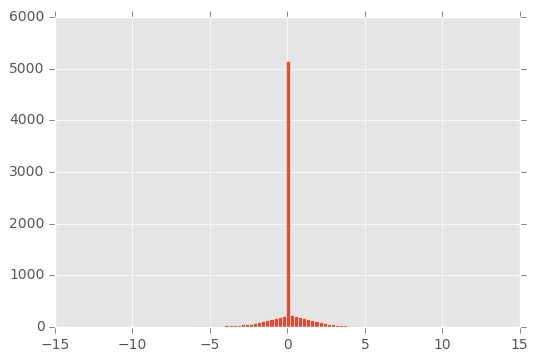

In [4]:
print(inst_series.shape)
inst_series.hist(bins=100)

(3544,)


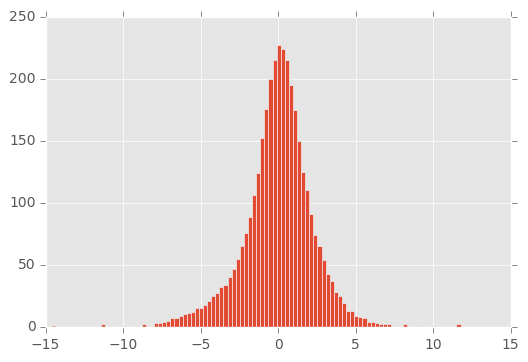

In [5]:
inst_series = inst_series[inst_series!=0]
print(inst_series.shape)
inst_series.hist(bins=100)

In [6]:
import bio_duplicate_correlation
df_scatter = bio_duplicate_correlation.view_scatter()

(8468, 45)
(8468, 45)


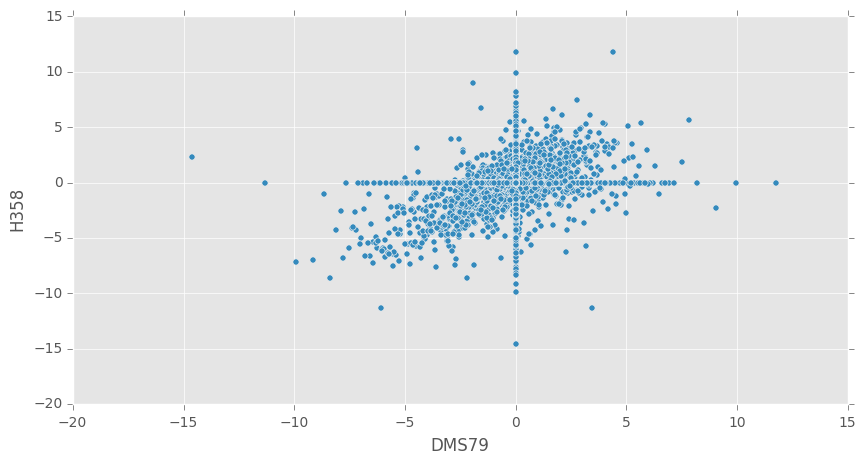

In [12]:
df_scatter.plot(kind='scatter', figsize=(10,5), x=cols[5], y=cols[30])